**CORSO ML 2024-2025**
# LAB0: PYTHON INTRODUCTION
**PART 1**

#### Summary
- **PART 0**: Python, variables, conditionals, loops, functions, classes
- **PART 1**: Colab and libraries

## Google Colab

- What is Google Colab? Execution environment for Jupyter Notebooks
- Why?
    - Cloud: no need to install anything locally
    - Free
    - Good computing power

### Access Colab

Connect to the link: [https://colab.research.google.com/](https://colab.research.google.com/)

Click on "Upload" to upload the notebook
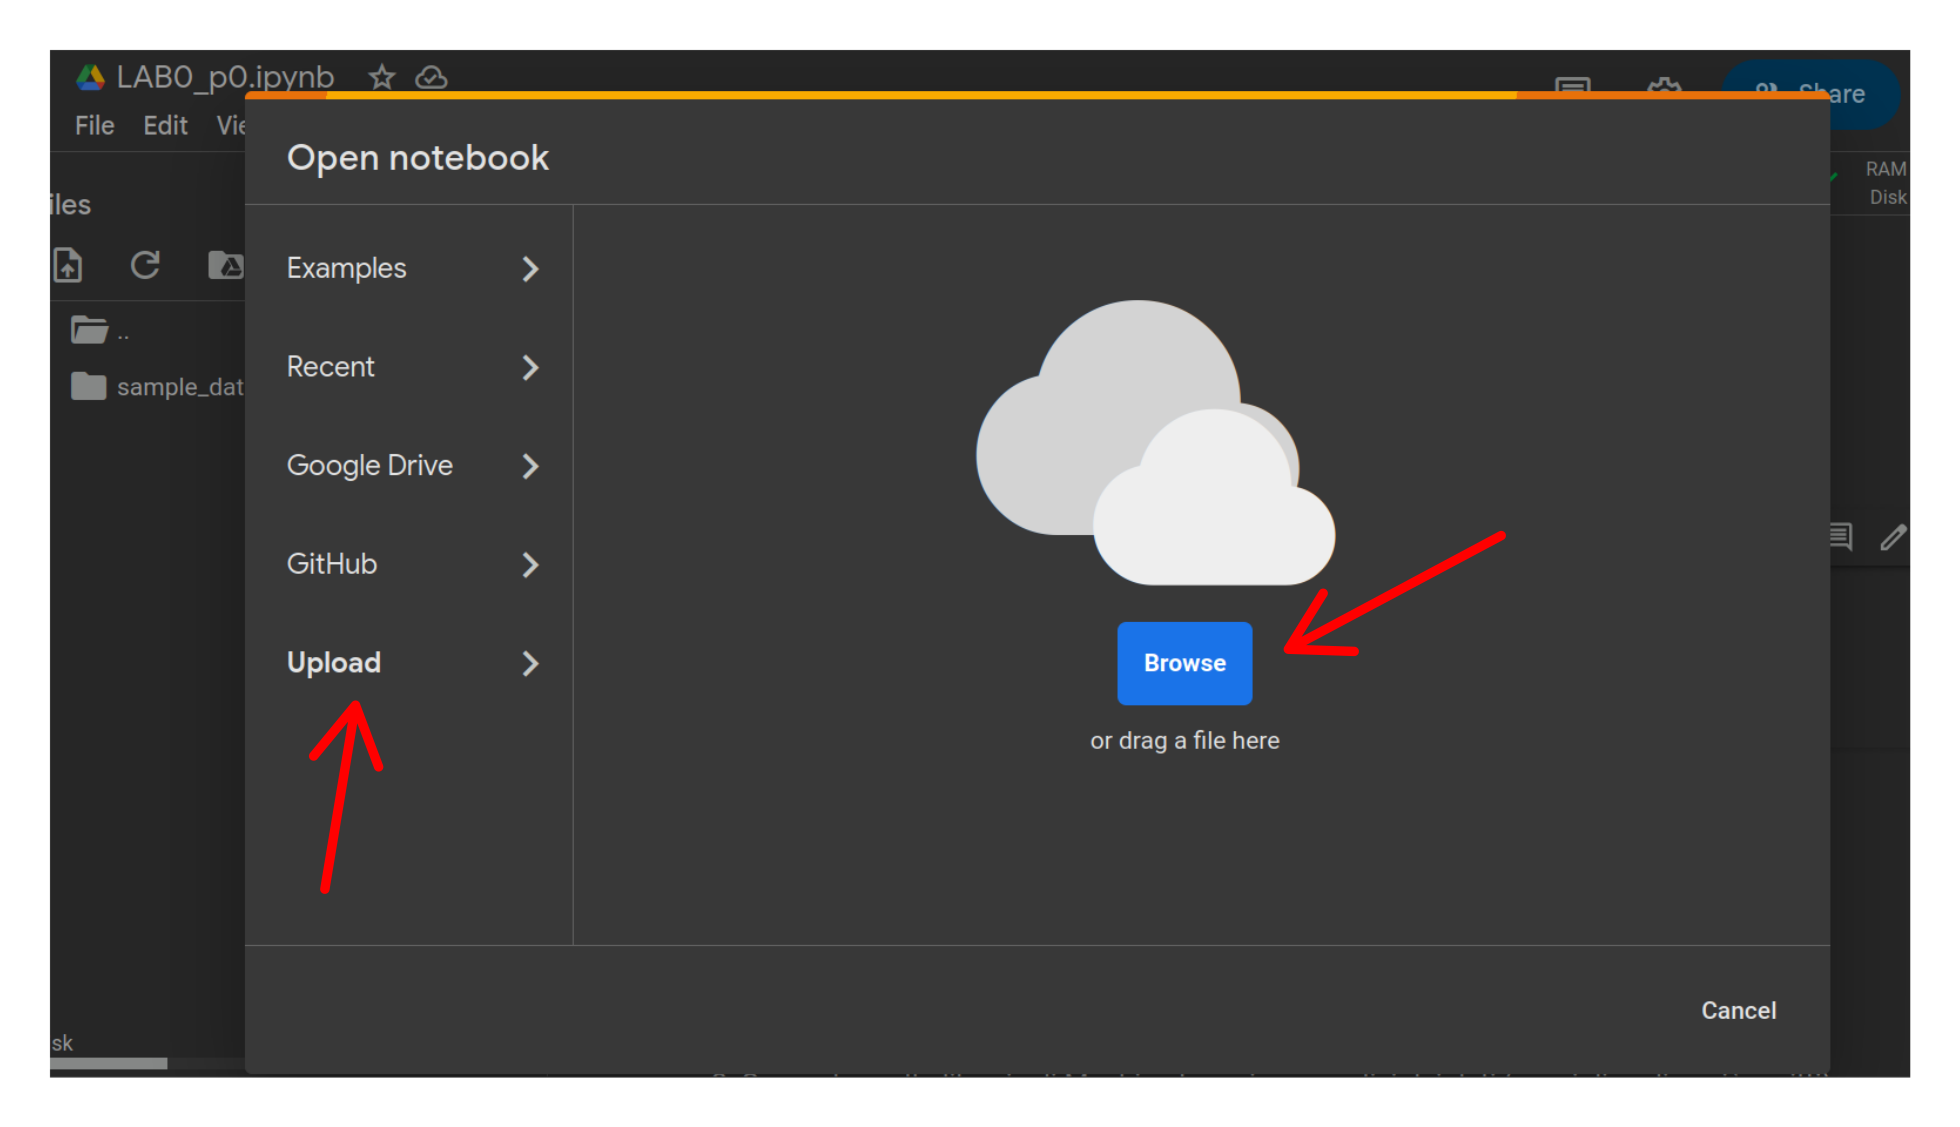

We can immediately start writing Python code and executing the cells
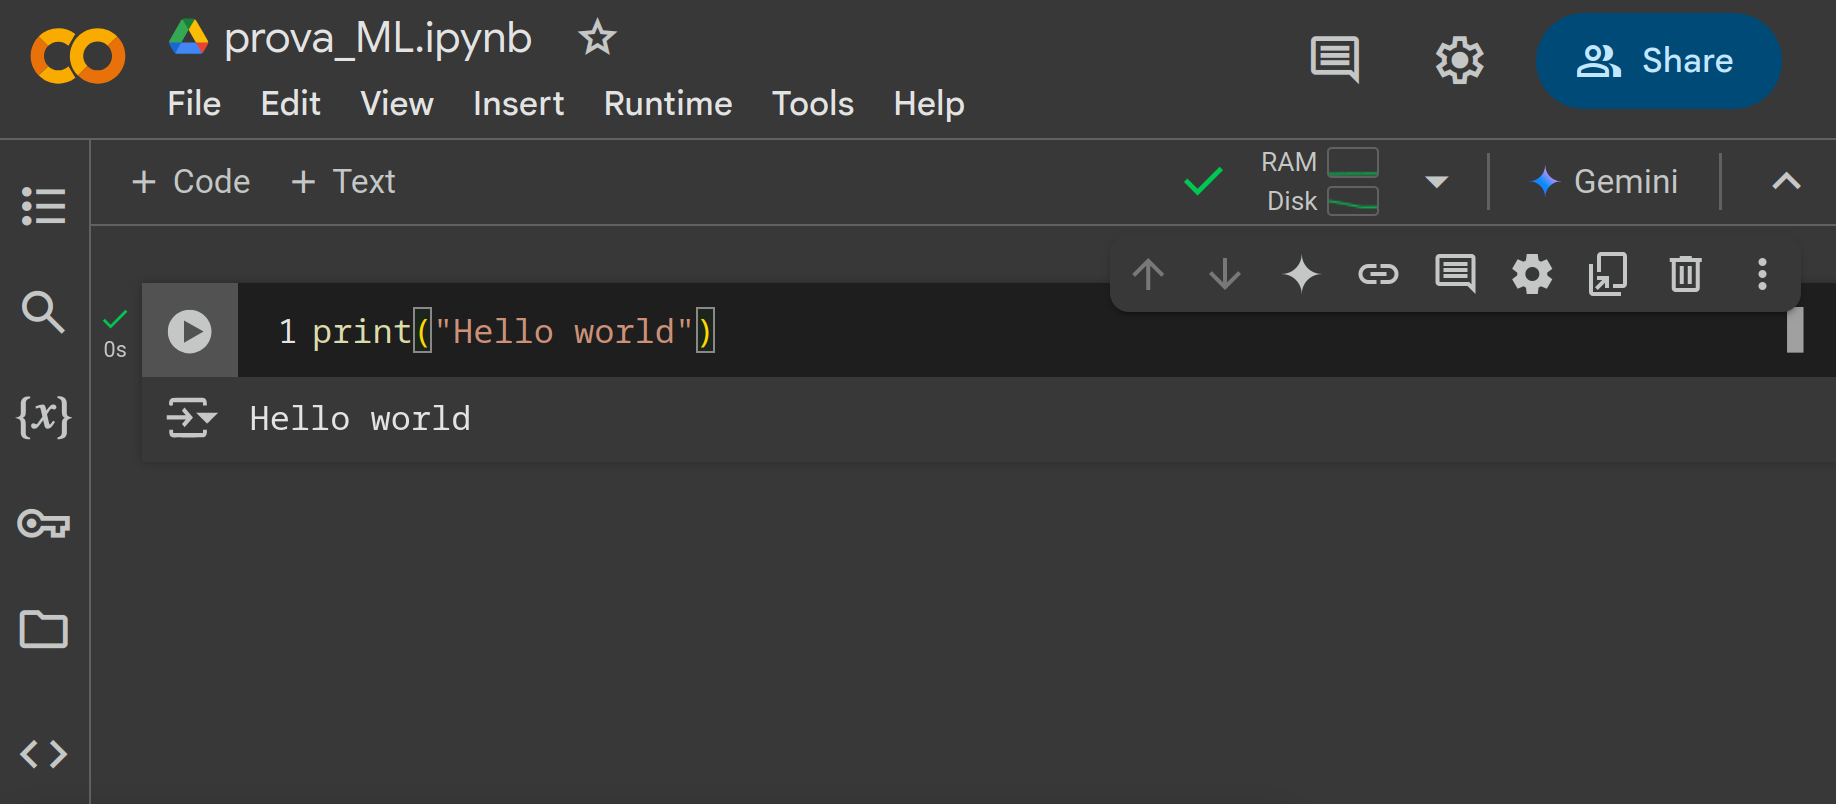

### File Management in Google Colab

Colab allows you to upload files from your local machine, save them, and download them.

Additionally, it is possible to mount Google Drive to access the files stored there.

By clicking on the folder icon, we can manage the files.
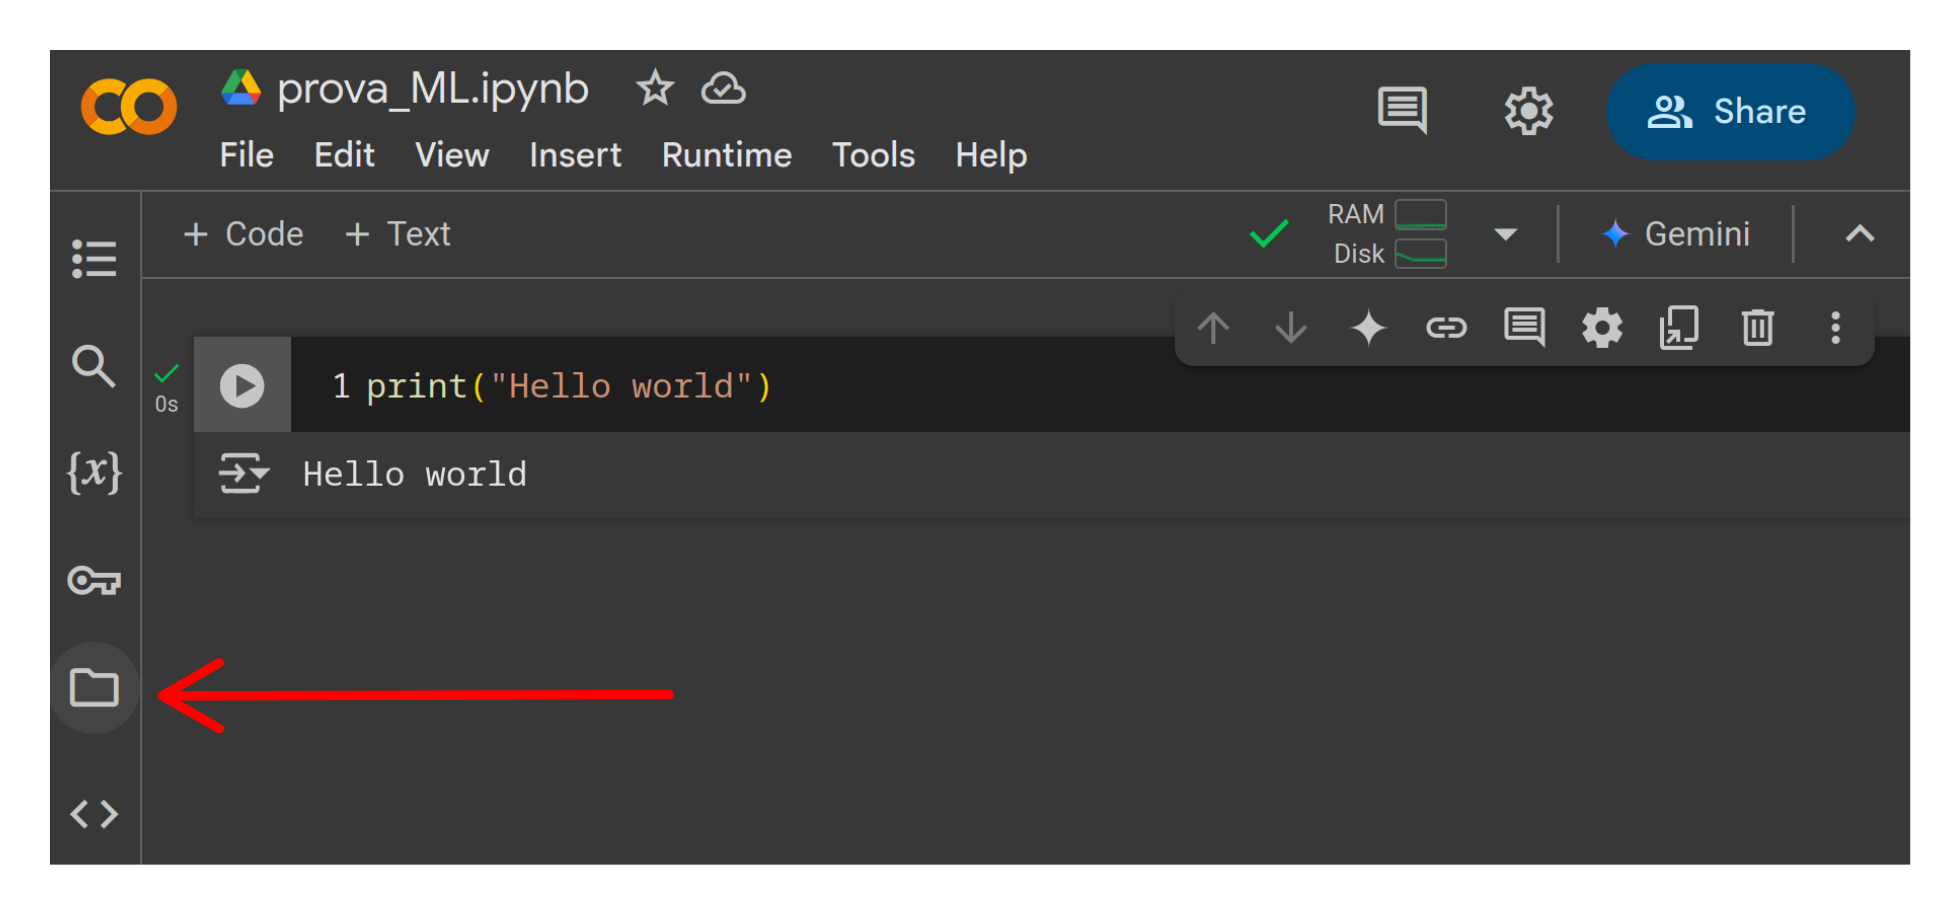

There are already some sample files inside the `sample_data` folder, but we can click on the icon with the drive symbol to mount our Google Drive.

The `drive` folder will then appear.

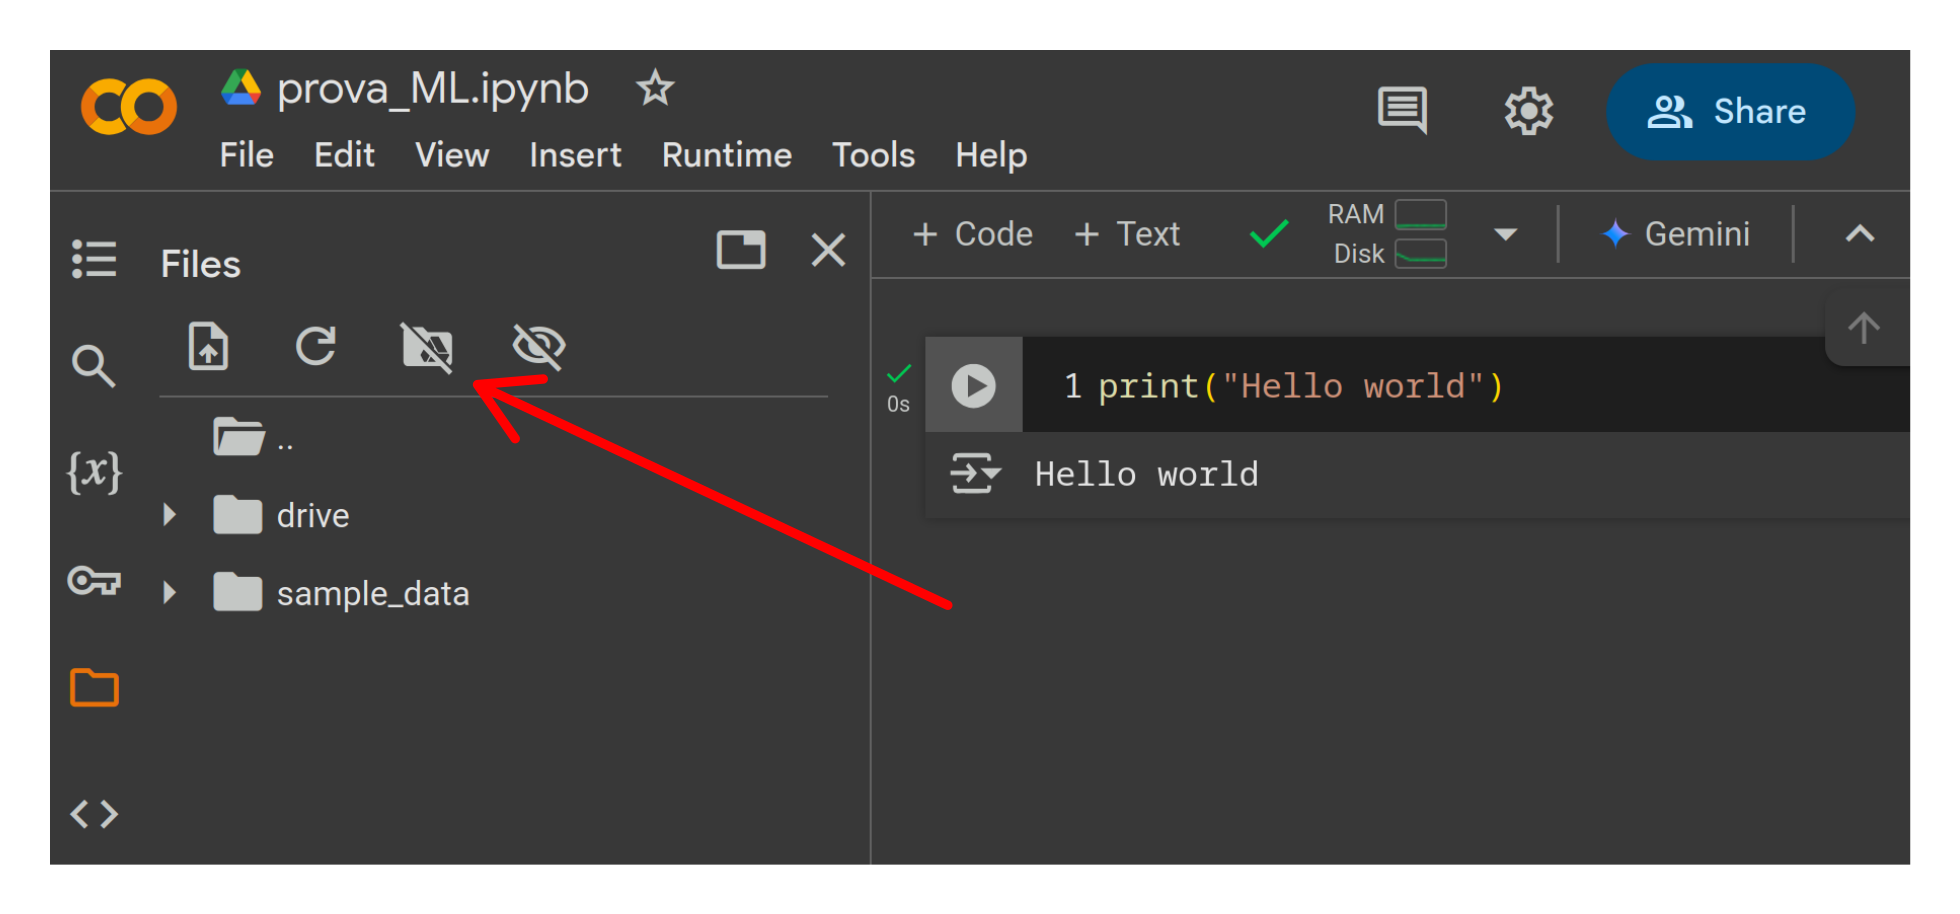

- I can use a file located in my drive.
- I can upload a file by dragging it into the folder I created with the example name: `AA24-25ML`
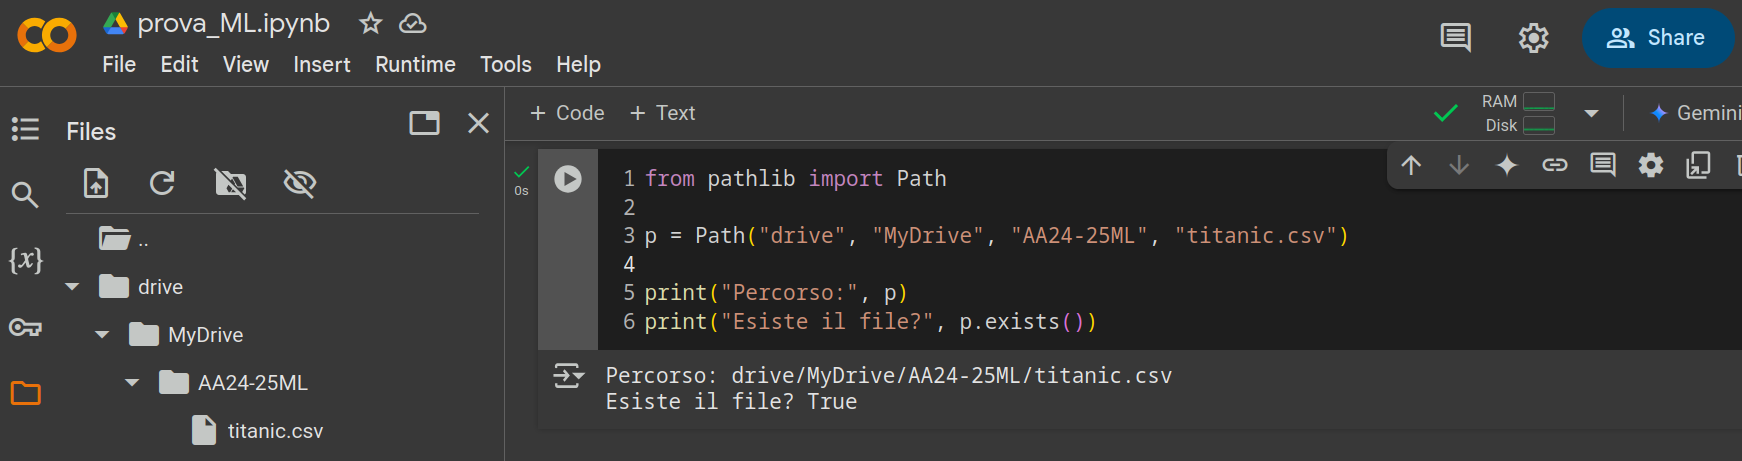

Once the file is uploaded, I can then execute the following cells, which will import the file into my notebook for use.

<span style="color:red"><strong>🏋️‍♀️ Exercise</strong></span>

**If you are on Google Colab:**
1. Mount Google Drive
2. Create a folder named `AA24-25ML` inside the `My Drive` folder which is inside the `drive` folder
3. Upload the `titanic.csv` file into the `AA24-25ML` folder
4. Execute the cell below to import the file


**If you are NOT on Google Colab**
1. Execute the cell below, it will create the folders for you
2. Place the `titanic.csv` file inside the `AA24-25ML` folder

In [1]:
# Import the library for path management
# (we will see libraries in detail in the next section)
from pathlib import Path

# Define the path and save it in the variable `p`
p = Path("drive", "MyDrive", "AA24-25ML", "titanic.csv")

# Create the folders if they do not exist
p.parent.mkdir(parents=True, exist_ok=True)

# Print the path
print("Path:", p)

Path: drive/MyDrive/AA24-25ML/titanic.csv


If you have done everything correctly, the file should exist. Let's verify by executing the following cell.

In [2]:
# Let's verify if the file exists with a conditional statement we have seen before
if p.exists():
    print("The file exists 😁")
else:
    print("The file does not exist 😢")

The file exists 😁


<div style="background-color: black; padding: 10px; color: white">
    <strong> ⚠️ Warning! </strong> If the file is not found, it could be one of the following reasons:
    
- You have named the folders incorrectly

- You are working in the wrong folder, you need to do everything in the notebook's folder. To see the path where this notebook is located, run the cell below.
</div>

In [3]:
# ⚠️ For those who cannot find the file: run this cell
# This is the path where the current notebook is located, where the folders and file should be found
if not p.exists():
    print("Your notebook is located here:", Path.cwd())

In [4]:
# ⚠️ If it still doesn't work, run this cell to create the file by downloading it from the internet
if not p.exists():
    import pandas as pd
    df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
    df.to_csv(p, index=False)

**Perché vorremmo usare un file?**

Perché questo file potrebbe contenere un dataset che vogliamo usare per fare analisi dati, oppure usare questi dati per allenare un modello.

## Libraries

Libraries are convenient because they make our lives easier; skilled programmers have already written good code that we can reuse.

It is better to use existing libraries rather than writing everything from scratch!

We don't need to reinvent the wheel!

- To import a library, we use the keyword `import`.
- If we want to import a specific functionality, we can select it with `from`.
- Additionally, if the library name is a bit long, we can rename it with `as`.

Let's make some examples with the `numpy` library, a classic library for scientific computing in Python.

> **Simply import**
> ```python
> import numpy
> ```

> **Import a specific functionality**
> 
> Maybe I only use a couple of functions from a library, in that case, we could import those specific ones.
> 
> ```python
> from numpy import array, mean
> ```

> **Import with an alias**
> 
> Writing `numpy` every time is a bit long, we can rename the library with an alias.
> 
> ```python
> import numpy as np
> ```

**How do I know what functionalities are available in a library?**

→ I look in the official documentation: for example, [numpy](https://numpy.org/doc/stable/)


### Library Examples

#### Pandas 🐼: like Excel, but in Python

[Link to the official documentation](https://pandas.pydata.org/docs/)

We can manipulate data in tabular format:
- Filter: select rows based on conditions
- Aggregate: calculate statistics

File management:
- It allows us to load CSV files, which is a tabular format similar to a spreadsheet.
- Besides loading data, we can also save them in a CSV file: useful for saving our results.

In [5]:
# First, let's import pandas, usually with the alias `pd` for convenience
import pandas as pd

# Read the Titanic .csv file 🚢
dataset = pd.read_csv(p)

Let's visualize the dataset as a table, we can use the `head()` method to see the first rows.

In [6]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Che colonne ha la nostra tabella? Possiamo usare l'attributo `columns`.

In [7]:
print(dataset.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Counting**

We can select only the rows that meet a certain condition.

For example, how many women and how many men boarded?

In [8]:
# Access the "Sex" column as if it were a dictionary
print(dataset["Sex"])

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object


In [9]:
dataset["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

**Statistiche**

Possiamo ad esempio calcolare l'età media dei passeggeri, o l'età massima.

In [10]:
average_age = dataset["Age"].mean()
max_age = dataset["Age"].max()

print(f"The average age is {average_age:.2f}") # pro tip: :.2f is used to print only 2 decimal places
print(f"The maximum age is {max_age}")

The average age is 29.70
The maximum age is 80.0


**Filtering**

We can select only the columns we are interested in.

Example: among passengers over 30 years old, how many were men and how many were women?

The age is in the `Age` column.

In [11]:
# Create a filter to select only rows with age greater than 30 years
filter = dataset["Age"] > 30

# Apply the filter to the dataset
filtered_dataset = dataset[filter]

# Count the values of the column we are interested in
filtered_dataset["Sex"].value_counts()

Sex
male      202
female    103
Name: count, dtype: int64

<span style="color:red"><strong>🏋️‍♀️ Exercise</strong></span>

Among the survivors (column `Survived`), show how many were men and how many were women.


In [12]:
# Develop your solution here


#### NumPy 🔢: mathematics at your fingertips

[Link to the official documentation](https://numpy.org/doc/stable/)

With `numpy` we can perform mathematical operations on arrays and matrices.


In [13]:
# Import the library
import numpy as np

We know that summing two lists concatenates them, but we can sum two arrays like vectors and matrices.

In [14]:
list1 = [1, 2, 3]
list2 = [4, 5, 6]

# If I sum the two lists, I get a list with concatenated values
print("Sum of the two lists:")
print(list1 + list2)

# I can convert them into numpy arrays and sum them
array1 = np.array(list1)
array2 = np.array(list2)

print("Sum of the two arrays:")
print(array1 + array2)

Sum of the two lists:
[1, 2, 3, 4, 5, 6]
Sum of the two arrays:
[5 7 9]


Let's create an array:
- of integers
- between 0 and 100
- with 10 elements

In [15]:
# Define a random array of 10 integer elements
range_min = 0
range_max = 100
num_elements = 10
random_array = np.random.randint(range_min, range_max, num_elements)

# Print the array
print(random_array)

[83 69 28 28 52 91 15 23 68 58]


**Tip 🕵**

If I don't remember the parameters of a function, I can use Python's `help()` function.

In [16]:
# Let's view the documentation for the function that generates a random array of integers
help(np.random.randint)

Help on built-in function randint:

randint(...) method of numpy.random.mtrand.RandomState instance
    randint(low, high=None, size=None, dtype=int)

    Return random integers from `low` (inclusive) to `high` (exclusive).

    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).

    .. note::
        New code should use the `~numpy.random.Generator.integers`
        method of a `~numpy.random.Generator` instance instead;
        please see the :ref:`random-quick-start`.

    Parameters
    ----------
    low : int or array-like of ints
        Lowest (signed) integers to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int or array-like of ints, optional
        If provided, one above the largest (signed) integer to be drawn
     

Let's create the identity matrix of size 3x3.

In [17]:
identity_matrix = np.eye(3)

print(identity_matrix)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


There are also other ways to define matrices:

In [18]:
# For example, a zero matrix of size 3x5
zero_matrix = np.zeros((3, 5))
print("zero_matrix:")
print(zero_matrix)

# Or a matrix of ones of size 4x2
ones_matrix = np.ones((4, 2))
print("ones_matrix:")
print(ones_matrix)

zero_matrix:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
ones_matrix:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]


You can get the size of vectors and matrices with the `shape` attribute.

In [19]:
matrix_dimension = zero_matrix.shape
print("Dimension of zero_matrix:", matrix_dimension)

Dimension of zero_matrix: (3, 5)


I can also create a matrix of random real numbers

In [20]:
random_matrix = np.random.rand(3, 3)
print(random_matrix)

[[0.82208637 0.69085458 0.60305962]
 [0.28441995 0.19864343 0.44142693]
 [0.26001593 0.07198111 0.5092403 ]]


I can create an array of ordered numbers

In [21]:
ordered_array = np.arange(9)
print(ordered_array)

[0 1 2 3 4 5 6 7 8]


Modify the array I created so that it becomes a 3x3 matrix

In [22]:
ordered_matrix = ordered_array.reshape(3, 3)
print(ordered_matrix)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Accessing matrix elements

In [23]:
print("first row:")
print(ordered_matrix[0])

print("first column:")
print(ordered_matrix[:, 0])

first row:
[0 1 2]
first column:
[0 3 6]


Assegno dei valori agli elementi della matrice

In [24]:
ordered_matrix = np.arange(9).reshape(3, 3)

print("original matrix:")
print(ordered_matrix)

print("matrix with the first column overwritten with zeros:")
ordered_matrix[:, 0] = 0
print(ordered_matrix)

original matrix:
[[0 1 2]
 [3 4 5]
 [6 7 8]]
matrix with the first column overwritten with zeros:
[[0 1 2]
 [0 4 5]
 [0 7 8]]


The transpose matrix is simple to obtain:

In [25]:
# To obtain the transpose, add `.T` to the matrix
transpose = ordered_matrix.T

print("original:")
print(ordered_matrix)

print("transpose:")
print(transpose)

original:
[[0 1 2]
 [0 4 5]
 [0 7 8]]
transpose:
[[0 0 0]
 [1 4 7]
 [2 5 8]]


Examples of vector operations:

In [26]:
vettore1 = array1
vettore2 = array2

print("vector1:")
print(vettore1)

print("vector2:")
print(vettore2)

print("dot product:")
print(vettore1 @ vettore2)

print("element-wise product:")
print(vettore1 * vettore2)

# The cross product is a function in numpy,
# `cross` stands for "cross product"
print("cross product:")
print(np.cross(vettore1, vettore2))

vector1:
[1 2 3]
vector2:
[4 5 6]
dot product:
32
element-wise product:
[ 4 10 18]
cross product:
[-3  6 -3]


Examples of matrix operations:

In [27]:
mat1 = np.arange(9).reshape(3, 3)
mat2 = np.random.randint(0, 10, (3, 3))

print("matrix 1:")
print(mat1)
print("matrix 2:")
print(mat2)

print("sum of the two matrices:")
print(mat1 + mat2)

print("matrix product:")
print(mat1 @ mat2)

print("element-wise product:")
print(mat1 * mat2)

matrix 1:
[[0 1 2]
 [3 4 5]
 [6 7 8]]
matrix 2:
[[2 3 9]
 [2 7 1]
 [4 2 8]]
sum of the two matrices:
[[ 2  4 11]
 [ 5 11  6]
 [10  9 16]]
matrix product:
[[ 10  11  17]
 [ 34  47  71]
 [ 58  83 125]]
element-wise product:
[[ 0  3 18]
 [ 6 28  5]
 [24 14 64]]


<span style="color:red"><strong>🏋️‍♀️ Exercise</strong></span>

Create a 5x5 matrix where each row contains consecutive integers from 1 to 5, with the main diagonal containing zeros, i.e., the trace of the matrix is zero.

Check the trace of the matrix using a conditional statement like:

```python
if np.trace(matrice) == 0:
    print("The matrix has zero trace")
else:
    print("The matrix has a trace different from zero")
```

In [28]:
# Develop your solution here
